<a href="https://colab.research.google.com/github/kodakallavenkataajaycharit25cs-hub/Ajay.K-repository/blob/master/K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Understanding K-means


In [88]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy import stats

In [81]:
# Standardizing the Data
df = pd.read_csv('bengaluru_orders.csv')
X = df[['lat', 'lon', 'hour','value','items']]
df_clean = df[(np.abs(stats.zscore(df[['lat','lon','hour','value','items']])) < 3).all(axis=1)]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(scaler.mean_),print(scaler.var_ ** 1/2) #Original Mean and Std
print(np.mean(X_scaled, axis=0), np.std(X_scaled, axis=0)) #Scaled Mean and Std


[ 12.96373137  77.66102625  25.00606495 645.31614665   3.933     ]
[4.56065761e-04 7.54274415e-04 1.51045346e+00 7.31710444e+04
 1.45625550e+00]
[ 3.75166564e-15  2.03783657e-13 -3.85469434e-16  1.13686838e-16
  1.13686838e-16] [1. 1. 1. 1. 1.]


In [82]:
k_means = KMeans(n_clusters= 4 ,init= 'k-means++', n_init= 1000, random_state= 42 )
k_means.fit(X_scaled)
print(k_means.cluster_centers_)


[[ 0.83173532  1.22481251 -0.91341593 -0.07374238 -0.06600269]
 [-1.1040459  -0.76166195 -0.00777967 -1.02485682 -0.55890592]
 [ 0.85922205  1.19113483  0.82549184 -0.06444203  0.12515871]
 [ 0.22205298 -0.57559486 -0.00821735  1.20580162  0.57159975]]


In [77]:
s = silhouette_score(X_scaled, k_means.labels_)
print(f"Silhouette Score: {s:.3f} ")
inertia = k_means.inertia_
print(f"Inertia: {inertia:.2f}")

df['cluster'] = k_means.labels_
X_original = df[['lat', 'lon']]


Silhouette Score: 0.297 
Inertia: 2223.29


Text(0.5, 1.0, 'Elbow Method')

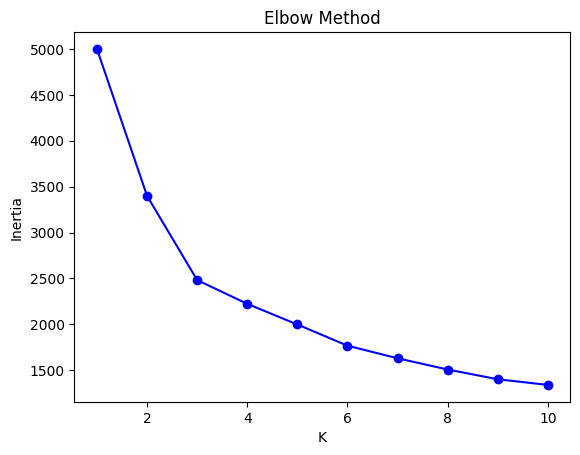

In [70]:
inertias = []
for k in range(1,11): inertias.append(KMeans(k, n_init=10).fit(X_scaled).inertia_)
plt.plot(range(1,11), inertias, 'bo-'); plt.xlabel('K'); plt.ylabel('Inertia'); plt.title('Elbow Method')


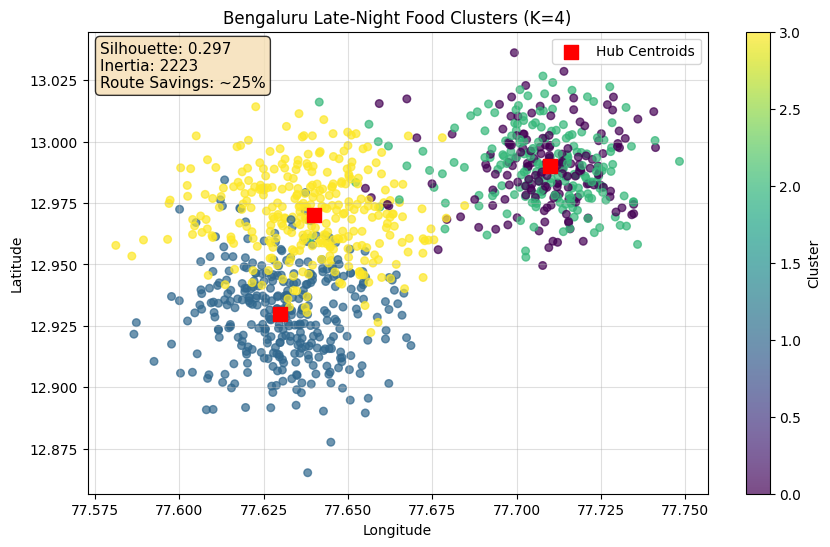

In [71]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['lon'], df['lat'], c = df['cluster'], cmap='viridis', s=30, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.title('Bengaluru Late-Night Food Clusters (K=4)')


plt.annotate(f'Silhouette: {s:.3f}\nInertia: {k_means.inertia_:.0f}\nRoute Savings: ~25%',
            xy=(0.02, 0.98), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
            fontsize=11, verticalalignment='top')


plt.scatter([77.63, 77.71, 77.64], [12.93, 12.99, 12.97],
            c='red', s=100, marker='s', label='Hub Centroids', zorder=5)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.4)
